In [1]:
#Se importan librerias de operaciones matematicas, de tratamiento de datos y de graficos 
import numpy as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#se leen los datos
datos=pd.read_excel(r'C:\Users\USUARIO\Documents\Python Scripts\Date_Fruit_Datasets.xlsx', sheet_name='Date_Fruit_Datasets')
datos

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


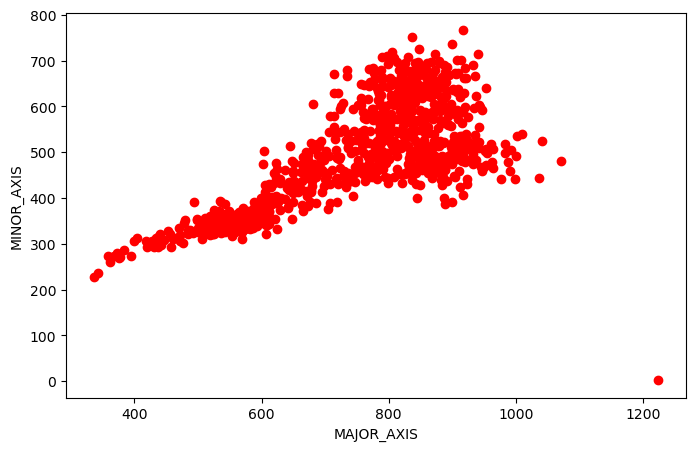

In [2]:
#Graficamos los datos
plt.figure(figsize=(8,5))
x_datos, y_datos = (datos['MAJOR_AXIS'].values, datos['MINOR_AXIS'].values)#Se toman los datos
plt.plot(x_datos, y_datos,'ro')# Se grafica
plt.xlabel('MAJOR_AXIS')
plt.ylabel('MINOR_AXIS')
plt.show()


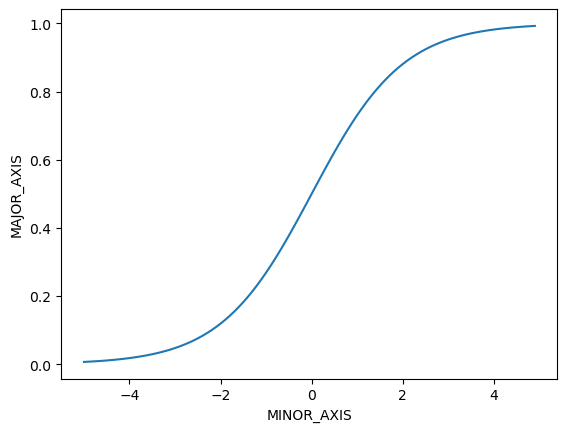

In [39]:
#Ejemplo de una funcion logistica para verificar el comportamiento
x= np.arange(-5.0, 5.0, 0.1)
y= 1.0/(1.0 + np.exp(-x))
plt.plot(x,y)
plt.ylabel('MAJOR_AXIS')
plt.xlabel('MINOR_AXIS')
plt.show()

In [4]:
#Definimos una funcion llamada sigmoide
def sigmoide(x,beta1,beta2):
    y=1/(1+np.exp(-beta1*(x-beta2)))
    return y

In [5]:
#graficamos una linea sigmoide que puede representar los datos
#vamos a suponer betal y beta 2
beta1= 0.10
beta2=1990.0

In [6]:
#Utilizamos la funcion para realizar una prediccion inicial
y_pred= sigmoide(x_datos,beta1, beta2)

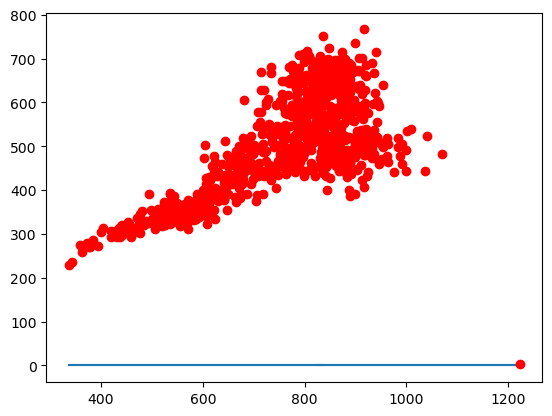

In [7]:
#Graficamos la prediccion inicial
plt.plot(x_datos, y_pred*700000)
plt.plot(x_datos, y_datos, "ro")
plt.show()

In [8]:
#Como se puede observar, requerimos de mejores parametros
#Empezaremos a noralizar los datos
x_datos = x_datos/max(x_datos)
y_datos = y_datos/max(y_datos)

In [9]:
#Utilizamos "curve fit" que utiliza minimos cuadrados no lineales
#Ajusta nuestra funcion sigmoide a los datos

from scipy.optimize import curve_fit #importamos libreria y funcion
betas, pcov = curve_fit(sigmoide, x_datos, y_datos)
print("beta_1 =%f, beta_2= %f" % (betas[0],betas[1]))

beta_1 =4.281420, beta_2= 0.463005


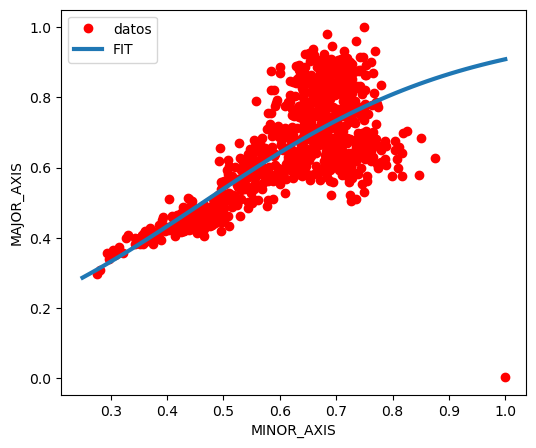

In [41]:
#Graficamos el nuevo modelo en funcion de los datos
x=np.linspace(2000, 500,55)
x=x/max(x)
plt.figure(figsize=(6,5))
y = sigmoide(x, *betas)
plt.plot(x_datos, y_datos, 'ro', label='datos')
plt.plot(x,y, linewidth= 3.0, label='FIT')
plt.legend(loc='best')
plt.ylabel('MAJOR_AXIS')
plt.xlabel('MINOR_AXIS')
plt.show()

In [38]:
#Creamos una mascara para seleccionar el 90% de los datos para entrenamiento
# y el 10% restante lo ocuparemos para testeo
msk= np.random.rand(len(datos)) <0.8
entreno_x = x_datos[msk]
entreno_y =y_datos[msk]
test_x = x_datos[~msk]
test_y = y_datos[~msk]

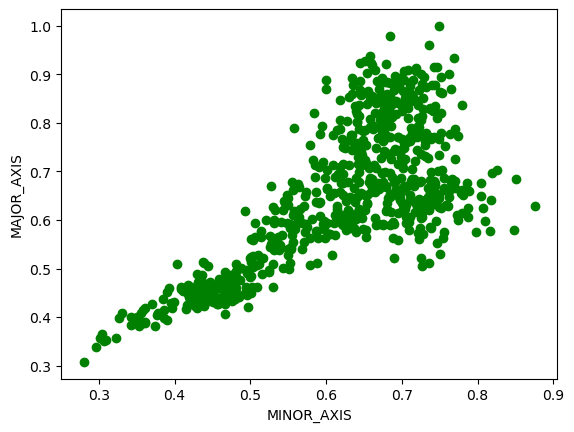

In [44]:
#Se grafican los datos que vamos a usar para entrenar 
plt.scatter(entreno_x, entreno_y, color="green")
plt.ylabel('MAJOR_AXIS')
plt.xlabel("MINOR_AXIS")
plt.show()

In [54]:
#Empezamos a entrenar los datos  con la funcion curva_fit
betas, pcov = curve_fit(sigmoide, entreno_x, entreno_y)

#Realizamos la prediccion utilizando la funcion que creamos pero con los datos
#que separamos para testear

yf=sigmoide(test_x, *betas)

#Realizamos la evaluacion con metricas 
print("Error absoluto medio:%.2f" %np.mean(np.absolute(yf-test_y)))
print("Suma residual de cuadrados(MSE): %.2f "%np.mean((yf -test_y)**2))
from sklearn.metrics import r2_score
print("Efectividad:%.2f" % r2_score(yf, test_y))


Error absoluto medio:0.08
Suma residual de cuadrados(MSE): 0.01 
Efectividad:-0.01
